In [1]:
import numpy as np

In [11]:
true_w = 2
true_b = -3
X = np.random.normal(2,size=50) #평균이 2
# np.random.normal(2, 3, size=50) 여기서 3은 분포의 표준 편차를 나타냅니다.


In [12]:
X

array([1.4930897 , 3.64631214, 2.10693918, 0.88142941, 0.67047183,
       1.76425021, 5.38487644, 1.52873438, 0.70131479, 1.39508547,
       3.55145747, 2.26821023, 1.97774852, 4.03278859, 1.53136624,
       0.28515801, 1.16331589, 2.43835252, 3.77864616, 2.06587588,
       2.07736153, 1.51402928, 2.9297202 , 0.70051789, 2.55174711,
       0.94774989, 2.65654969, 1.03241957, 1.57540707, 0.49379903,
       3.84649551, 3.59158973, 3.23039558, 1.59613037, 1.79423399,
       0.92562861, 1.34546691, 0.9760535 , 1.07272154, 1.2110542 ,
       1.07442434, 2.2464633 , 1.34441865, 1.80323534, 2.7199082 ,
       4.3720184 , 1.79142617, 1.62443715, 2.04337251, 2.15498592])

In [14]:
# y는 다음과 같은 관계식에 의해 얻어졌다.(가정)
y = true_w * X + true_b # y = 2X - 3
y

array([-0.01382061,  4.29262428,  1.21387837, -1.23714119, -1.65905634,
        0.52850042,  7.76975287,  0.05746877, -1.59737042, -0.20982907,
        4.10291494,  1.53642046,  0.95549705,  5.06557718,  0.06273248,
       -2.42968399, -0.67336822,  1.87670504,  4.55729232,  1.13175176,
        1.15472307,  0.02805856,  2.8594404 , -1.59896422,  2.10349421,
       -1.10450022,  2.31309939, -0.93516085,  0.15081415, -2.01240194,
        4.69299102,  4.18317946,  3.46079117,  0.19226075,  0.58846797,
       -1.14874279, -0.30906618, -1.04789299, -0.85455692, -0.5778916 ,
       -0.85115131,  1.4929266 , -0.31116271,  0.60647068,  2.4398164 ,
        5.7440368 ,  0.58285234,  0.2488743 ,  1.08674501,  1.30997184])

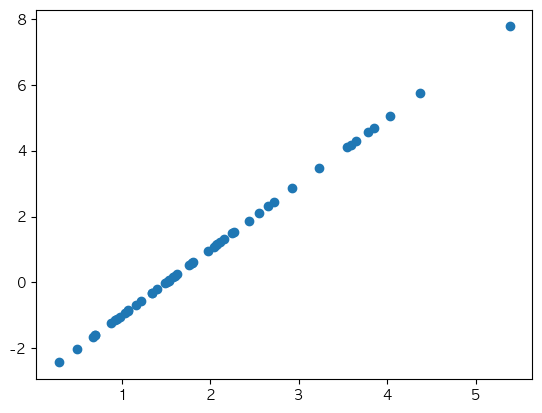

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

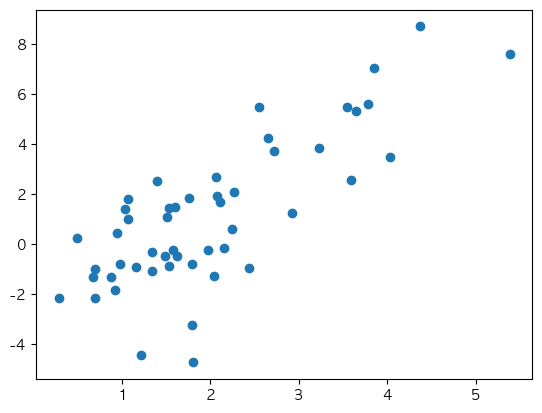

In [19]:
# noise
noise = np.random.normal(0.1,size=50)
y = y + noise
plt.scatter(X,y)

## 선형회귀 학습하기
- 파이썬에서 선형회귀 모형을 학습하기 위해서는 sklearn.linear_model안에 들어있는 LinearRegression을 사용하면 된다.
- sklearn.linear_model 내부에는 LinearRegression과 LogisticRegression 등 선형모형에 관련된 다양한 모델들이 존재한다.
- 실제 사용하기 전에 sklearn에서 제공하는 LienarRegression API를 읽어보길 권장한다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.4930897  3.64631214 2.10693918 0.88142941 0.67047183 1.76425021
 5.38487644 1.52873438 0.70131479 1.39508547 3.55145747 2.26821023
 1.97774852 4.03278859 1.53136624 0.28515801 1.16331589 2.43835252
 3.77864616 2.06587588 2.07736153 1.51402928 2.9297202  0.70051789
 2.55174711 0.94774989 2.65654969 1.03241957 1.57540707 0.49379903
 3.84649551 3.59158973 3.23039558 1.59613037 1.79423399 0.92562861
 1.34546691 0.9760535  1.07272154 1.2110542  1.07442434 2.2464633
 1.34441865 1.80323534 2.7199082  4.3720184  1.79142617 1.62443715
 2.04337251 2.15498592].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

- 현재 상황에서 reg.fit()명령어를 이용하여 학습하면 에러가나는데 그 이유는 X벡터가 1차원 벡터로 주어져 있기 때문이다. (현재의 차원 1차원, n개의 벡터)
- 1차원인 종속변수와 달리 머신러닝 상황에서 대부분의 데이터는 matrix형태, 즉 2차원의 형태를 갖는다. 따라서 현재 독립변수가 1개의 feature로 구성되어 있다 하더라도 이를 2차원의 형태로 바꾸어주어야 한다. (즉 2차원, nxp 형태로 바꾸어주어야 한다)
- 이를 위해 numpy에서 제공하는 reshape를 수행한다.
- reshape(-1,1)이라고 하면 뒤의 열은 1열로 하고 앞의 -1부분은 알아서 맞추라는 뜻이다. 따라서 데이터의 갯수인 n개가 자동으로 맞추어지게 된다.

In [26]:
X = X.reshape(-1, 1)

In [28]:
reg.fit(X,y)

LinearRegression()

In [29]:
reg.coef_, reg.intercept_

(array([2.06533055]), -3.016433778033549)

### 학습된 모형을 이용한 예측

In [30]:
y_pred = reg.predict(X)

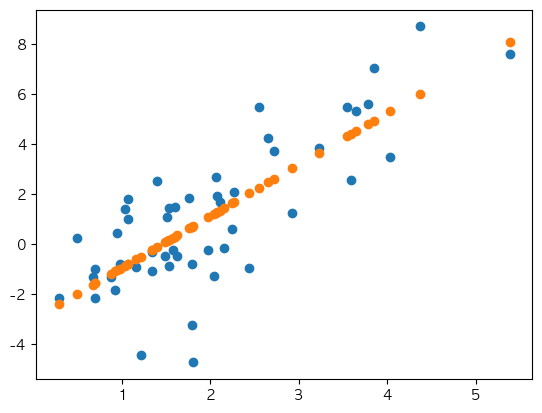

In [31]:
plt.scatter(X,y)
plt.scatter(X,y_pred)


### 새로운 데이터에 대한 예측

In [43]:
x2 = np.linspace(-5,5,50) ## -3부터 3까지 50개

In [44]:
y2_pred = reg.predict(np.linspace(-3,3,50).reshape(-1,1))

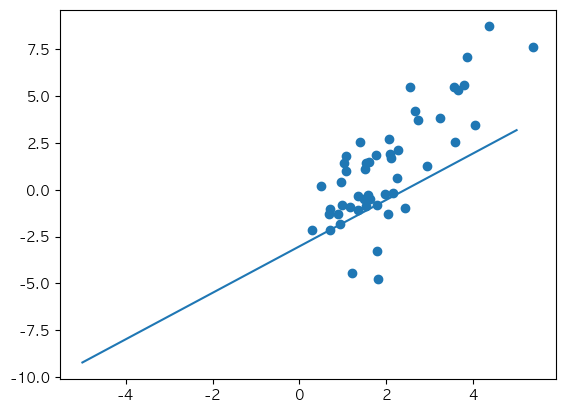

In [45]:
plt.scatter(X,y)
plt.plot(x2,y2_pred)